2024-07-07 06:46:47.844573: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 06:46:47.844682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 06:46:47.984911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   gas_type  true_concentration    sensor_1  sensor_2  sensor_3  sensor_4  \
0       5.0               100.0  11977.0371  2.946364  2.490357  3.283046   
1       4.0               100.0  21234.2896  4.223873  4.758852  6.588781   
2       5.0               100.0  13190.5258  3.139281  2.743704  3.603623   
3       4.0               100.0  15803.7851  3.500589  3.375378  4.549901   
4       5.0               100.0  16342.6787  3.497127  3.393961  4.303557   

    sensor_5  sensor_6  sensor_7   sensor_8  ...  sensor_119  sensor_120  \
0   8.131875 -1.657614 -2.670484 -11.795855  ...   -2.423573   -7.170650   
1  10.873780 -3.145160 -4.474324 -14.394855  ...   -7.378631  -14.347134   
2   8.335304 -1.807550 -2.781656  -9.959871  ...   -2.658821   -7.089700   
3   8.983869 -2.278670 -3.915519 -11.937122  ...   -7.464786  -16.511583   
4   8.713730 -2.173565 -3.373084 -11.741132  ...   -2.437892   -6.492106   

   sensor_121  sensor_122  sensor_123  sensor_124  sensor_125  sensor_126  \
0  

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
36/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5559 

I0000 00:00:1720334825.346553     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.5607 - val_loss: 0.2919
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4357 - val_loss: 0.2287
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2775 - val_loss: 0.2117
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3205 - val_loss: 0.2070
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2182 - val_loss: 0.2027
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1929 - val_loss: 0.1777
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2100 - val_loss: 0.1952
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1663 - val_loss: 0.1704
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3398 - val_loss: 0.2222
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2162 - val_loss: 0.1923
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2234 - val_loss: 0.1773
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2316 - val_l

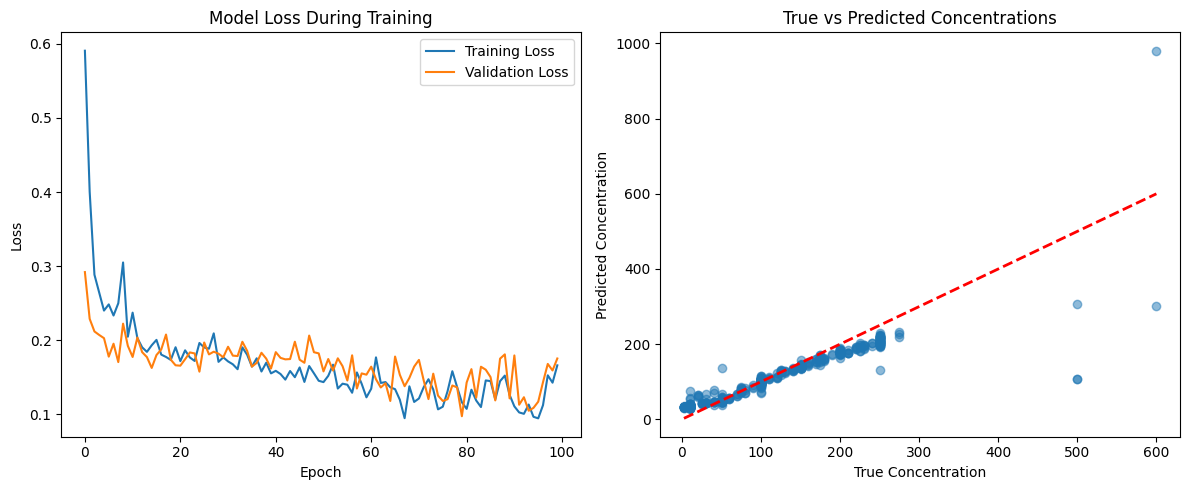

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to parse each line of the data
def parse_line(line):
    parts = line.strip().split()
    label, concentration = map(float, parts[0].split(';'))
    features = [float(part.split(':')[1]) for part in parts[1:]]
    return [label, concentration] + features

# Data loading and preprocessing
path = '/kaggle/input/gas-sensor-array-drift-dataset'
files = os.listdir(path)
data = []

for file in files:
    if file.endswith('.dat'):
        with open(os.path.join(path, file), 'r') as f:
            for line in f:
                data.append(parse_line(line))

# Convert to DataFrame
columns = ['gas_type', 'true_concentration'] + [f'sensor_{i}' for i in range(1, 129)]
df = pd.DataFrame(data, columns=columns)

print(df.head())

# For this example, let's focus on one gas type (you can modify this as needed)
gas_type = 1  # Change this to the gas type you want to calibrate for
df_gas = df[df['gas_type'] == gas_type]

# Splitting the Dataset
X = df_gas.iloc[:, 2:]  # Sensor readings
y = df_gas['true_concentration']  # True concentration (what we want to predict)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Define the model for inverse calibration
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output is the estimated true concentration
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot results
plt.figure(figsize=(12, 5))

# Training history
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# True vs Predicted concentrations
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Concentration')
plt.ylabel('Predicted Concentration')
plt.title('True vs Predicted Concentrations')

plt.tight_layout()
plt.show()